In [67]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import itertools as it
import pulp
from sklearn.cluster import KMeans
import time
pal = sns.color_palette("hls", 8)

sys.path.append(os.path.join(os.getcwd(), 'code'))
from spatial_generation import Spatial, GroupSpatial
from elections import SNTV,Bloc,STV,Borda,RandomDictator,PRD, PluralityVeto, ChamberlainCourant, Monroe, GreedyCC
from tools import cost, best_group_cost, representativeness, remove_candidates, borda_matrix
from election_sampling import election_sample, samples

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Group Representation

In [41]:
# Choose number of voters n
# And the number of candidates m
n = 200
m = 200

# And the number of winners for the election
k = 20 

#### 2 Party

In [3]:
# Means for each of the 4 Gaussian distributions
means = [[-1.5, 0], [1.5, 0]]
stds = [0.5, 0.5]  # Standard deviations for each Gaussian
two_party_G = [100,100]  # Group Sizes

voter_params = [{'loc': None, 'scale': None, 'size': 2} for _ in range(len(two_party_G))]
for i,mean in enumerate(means):
    voter_params[i]['loc'] = mean

for i,std in enumerate(stds):
    voter_params[i]['scale'] = std
    
candidate_params = {'low': -3, 'high': 3, 'size': 2}

distance = lambda point1, point2: np.linalg.norm(point1 - point2)

two_party_generator = GroupSpatial(m = m, g = len(two_party_G),
                    voter_dists = [np.random.normal]*len(two_party_G), voter_params = voter_params,
                    candidate_dist = np.random.uniform, candidate_params = candidate_params,
                    distance = distance)

In [4]:
# Generate a profile from random candidate and voter positions
profile, candidate_positions, voter_positions, voter_labels = two_party_generator.generate(two_party_G)

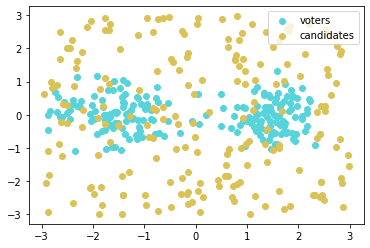

In [5]:
# visualize the results
pal = sns.color_palette("hls", 8)
plt.scatter(voter_positions[:,0], voter_positions[:,1], label = 'voters', color = pal[4])
plt.scatter(candidate_positions[:,0], candidate_positions[:,1], label = 'candidates', color = pal[1])
plt.legend()

In [46]:
start = time.time()
STV(profile,k)
end = time.time()
print(end - start)

0.1825704574584961


In [47]:
start = time.time()
GreedyCC(profile,k)
end = time.time()
print(end - start)

0.07256507873535156


In [60]:
start = time.time()
ChamberlainCourant(profile,k)
end = time.time()
print(end - start)

5.901599168777466


In [68]:
start = time.time()
Monroe(profile,k)
end = time.time()
print(end - start)

185.95491886138916


### 3 Party

In [135]:
# Means for each of the 4 Gaussian distributions
means = [[-2, -1], [2, -1], [0, 2]]
stds = [0.5, 0.5, 0.5]  # Standard deviations for each Gaussian
three_party_G = [67,67,66]  # Group Sizes

voter_params = [{'loc': None, 'scale': None, 'size': 2} for _ in range(len(G))]
for i,mean in enumerate(means):
    voter_params[i]['loc'] = mean

for i,std in enumerate(stds):
    voter_params[i]['scale'] = std
    
candidate_params = {'low': -3, 'high': 3, 'size': 2}

distance = lambda point1, point2: np.linalg.norm(point1 - point2)

three_party_generator = GroupSpatial(m = m, g = len(three_party_G),
                    voter_dists = [np.random.normal]*len(three_party_G), voter_params = voter_params,
                    candidate_dist = np.random.uniform, candidate_params = candidate_params,
                    distance = distance)

In [136]:
# Generate a profile from random candidate and voter positions
profile, candidate_positions, voter_positions, voter_labels = three_party_generator.generate(three_party_G)

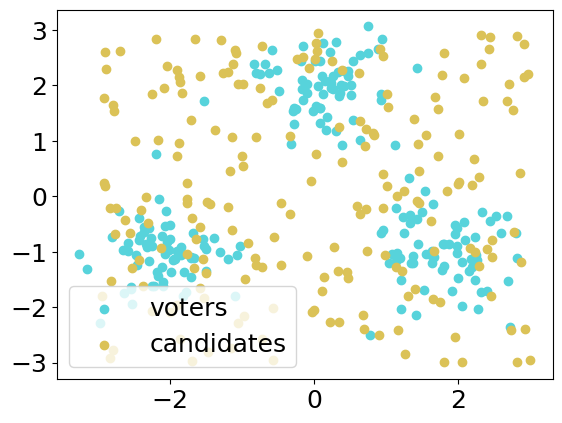

In [137]:
# visualize the results
pal = sns.color_palette("hls", 8)
plt.scatter(voter_positions[:,0], voter_positions[:,1], label = 'voters', color = pal[4])
plt.scatter(candidate_positions[:,0], candidate_positions[:,1], label = 'candidates', color = pal[1])
plt.legend()

### 4 Party

In [138]:
# Means for each of the 4 Gaussian distributions
means = [[-2, 0], [2, 0], [0, 2], [0, -2]]
stds = [0.5, 0.5, 0.5, 0.5]  # Standard deviations for each Gaussian
four_party_G = [50, 50, 50, 50]  # Group Sizes

voter_params = [{'loc': None, 'scale': None, 'size': 2} for _ in range(len(G))]
for i,mean in enumerate(means):
    voter_params[i]['loc'] = mean

for i,std in enumerate(stds):
    voter_params[i]['scale'] = std
    
candidate_params = {'low': -3, 'high': 3, 'size': 2}

distance = lambda point1, point2: np.linalg.norm(point1 - point2)

four_party_generator = GroupSpatial(m = m, g = len(four_party_G),
                    voter_dists = [np.random.normal]*len(four_party_G), voter_params = voter_params,
                    candidate_dist = np.random.uniform, candidate_params = candidate_params,
                    distance = distance)

In [139]:
# Generate a profile from random candidate and voter positions
profile, candidate_positions, voter_positions, voter_labels = four_party_generator.generate(four_party_G)

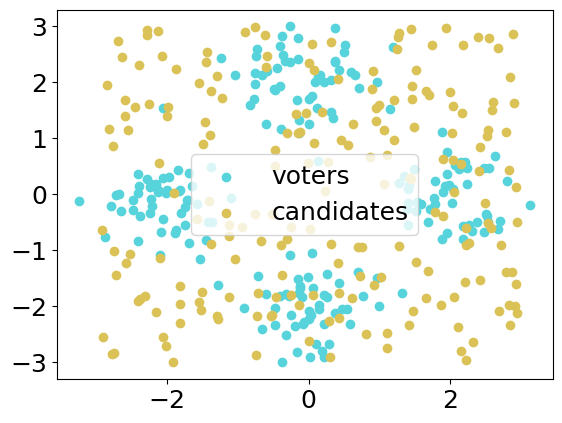

In [140]:
# visualize the results
pal = sns.color_palette("hls", 8)
plt.scatter(voter_positions[:,0], voter_positions[:,1], label = 'voters', color = pal[4])
plt.scatter(candidate_positions[:,0], candidate_positions[:,1], label = 'candidates', color = pal[1])
plt.legend()

### 5 party

In [141]:
# Means for each of the 4 Gaussian distributions
means = [[-2, -2], [2, 2], [-2, 2], [2, -2], [0,0]]
stds = [0.5, 0.5, 0.5, 0.5, 0.5]  # Standard deviations for each Gaussian
five_party_G = [40, 40, 40, 40, 40]  # Group Sizes

voter_params = [{'loc': None, 'scale': None, 'size': 2} for _ in range(len(G))]
for i,mean in enumerate(means):
    voter_params[i]['loc'] = mean

for i,std in enumerate(stds):
    voter_params[i]['scale'] = std
    
candidate_params = {'low': -3, 'high': 3, 'size': 2}

distance = lambda point1, point2: np.linalg.norm(point1 - point2)

five_party_generator = GroupSpatial(m = m, g = len(five_party_G),
                    voter_dists = [np.random.normal]*len(five_party_G), voter_params = voter_params,
                    candidate_dist = np.random.uniform, candidate_params = candidate_params,
                    distance = distance)

In [142]:
# Generate a profile from random candidate and voter positions
profile, candidate_positions, voter_positions, voter_labels = five_party_generator.generate(five_party_G)

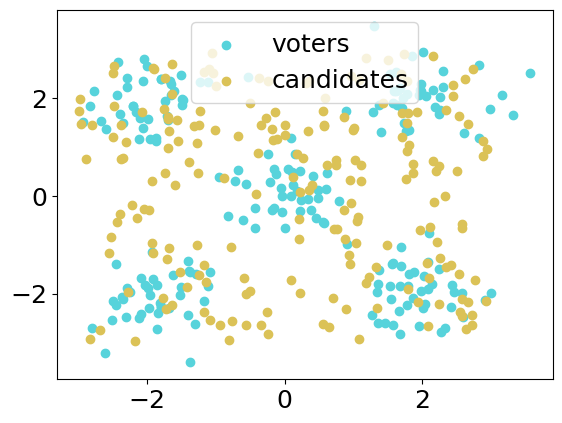

In [143]:
# visualize the results
pal = sns.color_palette("hls", 8)
plt.scatter(voter_positions[:,0], voter_positions[:,1], label = 'voters', color = pal[4])
plt.scatter(candidate_positions[:,0], candidate_positions[:,1], label = 'candidates', color = pal[1])
plt.legend()

### Elections

In [11]:
elections_dict = {SNTV:{}, STV:{},
                 Borda:{}, RandomDictator:{}, 
                  PRD:{}, PluralityVeto:{}}
elections_list = [SNTV, STV, Borda, RandomDictator, PRD, PluralityVeto]
n_samples = 10000

In [ ]:
f = 'data/2party.npz'

start = time.time()
result_dict = samples(n_samples, two_party_generator, elections_dict, two_party_G, k, dim = 2, filename = f)
end = time.time()
print(end - start)

#loaded_data = np.load(f)
#result_dict = {key: loaded_data[key] for key in loaded_data.files}

ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhaust

ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhaust

ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhaust

ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhaust

ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhaust

ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhausted
ballot exhaust

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(6, 16), dpi = 200)
plt.rcParams.update({'font.size': 12})

for i, ax in enumerate(axes.flat):
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')

vc = pal[5]
cc = pal[7]

sample_idx = 1
voter_example = result_dict['voters'][sample_idx]
voter_stack = pd.DataFrame(np.vstack(result_dict['voters']), columns = ['x','y'])
#voter_stack = voter_stack.sample(frac=0.1, random_state=42)

# Baseline
candidate_example = result_dict['candidates'][sample_idx]
candidate_stack = pd.DataFrame(np.vstack(result_dict['candidates']), columns = ['x','y'])
#candidate_stack = candidate_stack.sample(frac=0.1, random_state=42)
sns.kdeplot(data=voter_stack, x='x', y='y', color = vc, fill=False,
            thresh=0.1, levels=10, ax = axes[0][0])
sns.kdeplot(data=candidate_stack, x='x', y='y', color = cc, fill=False,
            thresh=0.1, levels=10, alpha = 0.8, ax = axes[0][0])
axes[0][0].set_title('Distribution')
axes[0][0].set_ylabel('Baseline')
axes[0][0].set_xlabel('')

axes[0][1].scatter(voter_example[:,0], voter_example[:,1], label = 'voters', color = vc)
axes[0][1].scatter(candidate_example[:,0], candidate_example[:,1], label = 'winners', color = cc)
axes[0][1].set_title('Example')
axes[0][1].legend()


for i,E in enumerate(elections_list):
    name = E.__name__
    ax_idx = i + 1

    candidate_example = result_dict[name][sample_idx]
    candidate_stack = pd.DataFrame(np.vstack(result_dict[name]), columns = ['x','y'])
    #candidate_stack = candidate_stack.sample(frac=0.1, random_state=42)
    
    sns.kdeplot(data=voter_stack, x='x', y='y', color = vc, fill=False,
                thresh=0.1, levels=10, ax = axes[ax_idx][0])
    sns.kdeplot(data=candidate_stack, x='x', y='y', color = cc, fill=False,
                thresh=0.1, levels=10, alpha = 0.8, ax = axes[ax_idx][0])
    
    axes[ax_idx][0].set_ylabel(name)
    axes[ax_idx][0].set_xlabel('')
    
    axes[ax_idx][1].scatter(voter_example[:,0], voter_example[:,1], label = 'voters', color = vc)
    axes[ax_idx][1].scatter(candidate_example[:,0], candidate_example[:,1], label = 'winners', color = cc)



plt.savefig('figures/2party.png', bbox_inches='tight')

### Representativeness

In [ ]:
avg_represent = {e.__name__:np.zeros(n_samples) for e in elections_list}

for i in range(n_samples):
    if i % 1000 == 0:
        print(i)
    voter_positions = result_dict['voters'][i]
    # partition voters to their known groups
    labels = result_dict['labels'][i]
    groups = [[j for j in range(len(labels)) if labels[j] == i] for i in np.unique(labels)]
    candidate_positions = result_dict['candidates'][i]
    
    for j,E in enumerate(elections_list):
        name = E.__name__
        winners = result_dict[name][i]
        represent = representativeness(voter_positions, candidate_positions, groups, winners)
        avg_represent[name][i] = represent

In [ ]:
# Combine the arrays into a list
represent_data = [values for values in avg_represent.values()]
represent_labels = [name for name in avg_represent.keys()]

plt.rcParams.update({'font.size': 18})
# Create a violin plot
plt.figure(figsize=(10, 6), dpi = 200)
ax = sns.violinplot(data=represent_data, palette = pal[2:], alpha = 1)
for violin in ax.collections:
    violin.set_alpha(1)
plt.xticks(ticks=np.arange(6), labels=represent_labels, rotation=25)
plt.ylabel('Epsilon')
plt.savefig('figures/2party_representation.png', bbox_inches='tight')
plt.show()

In [ ]:
avg_represent1 = {e.__name__:np.zeros(n_samples) for e in elections_list}

for i in range(n_samples):
    if i % 1000 == 0:
        print(i)
    voter_positions = result_dict['voters'][i]
    # partition voters to a single group
    labels = result_dict['labels'][i]
    labels = np.zeros(len(labels))
    groups = [[j for j in range(len(labels)) if labels[j] == i] for i in np.unique(labels)]
    candidate_positions = result_dict['candidates'][i]
    
    for j,E in enumerate(elections_list):
        name = E.__name__
        winners = result_dict[name][i]
        represent = representativeness(voter_positions, candidate_positions, groups, winners)
        avg_represent[name][i] = represent

In [ ]:
# Combine the arrays into a list
represent_data = [values for values in avg_represent1.values()]
represent_labels = [name for name in avg_represent1.keys()]

plt.rcParams.update({'font.size': 18})
# Create a violin plot
plt.figure(figsize=(10, 6), dpi = 200)
ax = sns.violinplot(data=represent_data, palette = pal[2:], alpha = 1)
for violin in ax.collections:
    violin.set_alpha(1)
plt.xticks(ticks=np.arange(6), labels=represent_labels, rotation=25)
plt.ylabel('Epsilon')
plt.savefig('figures/2party_representation1.png', bbox_inches='tight')
plt.show()

### Changing Group Membership

In [ ]:
used_samples = 100
max_clusters = 20
avg_cluster_represent = {e.__name__:np.zeros((m, used_samples)) for e in elections_list}

for t in range(1,max_clusters):
    print(t)
    for i in range(used_samples):
        voter_positions = result_dict['voters'][i]
        # partition voters to groups
        kmeans = KMeans(n_clusters=t, random_state=0, n_init="auto").fit(voter_positions)
        labels = kmeans.labels_
        groups = [[j for j in range(len(labels)) if labels[j] == i] for i in np.unique(labels)]
        candidate_positions = result_dict['candidates'][i]
        
        for j,E in enumerate(elections_list):
            name = E.__name__
            winners = result_dict[name][i]
            represent = representativeness(voter_positions, candidate_positions, groups, winners)
            avg_cluster_represent[name][t-1,i] = represent

In [ ]:
fig,ax = plt.subplots(dpi = 200)
up_to = 20
for i,E in enumerate(elections_list):
    cluster_data = avg_cluster_represent[E.__name__]
    means = np.mean(cluster_data, axis=1)
    means = means[:up_to]
    std_devs = np.std(cluster_data, axis=1)
    std_devs = std_devs[:up_to]
    
    ax.plot(means, label=E.__name__, color=pal[2+i], linewidth = 3)
    ax.fill_between(range(up_to), means - std_devs, means + std_devs, color=pal[2+i], alpha=0.05)

plt.xlabel('Number of Clusters')
plt.ylabel('Epsilon')
plt.legend()
plt.savefig('figures/2party_cluster.png', bbox_inches='tight')
plt.show()